# Lineal Regression

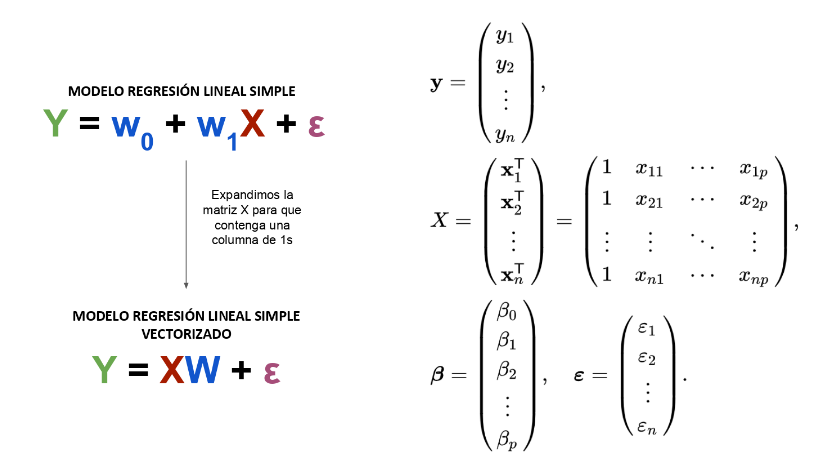

In [1]:
# We import the SKlearn library, it includes many Machine Learning functionalities.
# This library also includes some famous dataset like the one we'll use today:
# The Boston Housing Dataset

import sklearn as skl

# We import the function that loads the data
from sklearn.datasets import load_boston

# We also import some libraries to be used later
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
# The loaded data from the Sklearn library contains a description
# of the dataset, saved in the DESCR atribute

boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

# Information about dataset dimensions is saved:
# n = number of data points
# p = number of features

n, p = X.shape
print(n, p)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 1. Initial exploratory analysis.


We will focus on modeling the relationship between the variables **RM** (average number of rooms) and **MEDV** (average house value). As should be customary, we will first begin by understanding the nature of our data, performing a preliminary exploratory analysis.
We will make use of the statistical and mathematical tools we have learned to get a better picture of what our data represent.

We'll try to answer some questions about the dataset

---

1.  **Is there any relation between the variables RM and MEDV?**

2.   **What is the average price of the houses whose average number of rooms ranges from 5 to 6?**

3. **Do you identify any anomalous phenomena in the distribution of the data?**

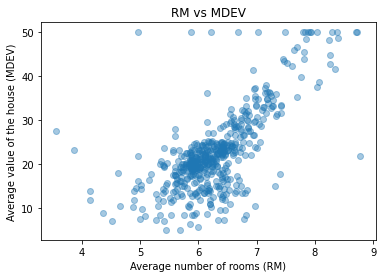

---
The correlation coeficient is: 0.6953599470715393
---
The average value of houses when: 5 > RM > 6 is: 17.551592356687898
---


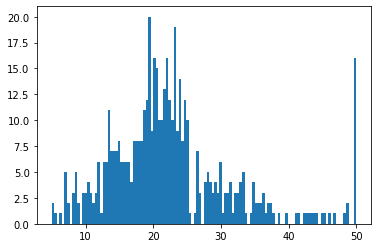

There is an anomalous peak of homes with a median value of exactly $50,000.
This is possibly the result of the truncation of those home values above this figure.


In [3]:
# Visualization of the relation between variables

plt.title("RM vs MDEV")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Average value of the house (MDEV)")
plt.scatter(X[:, 5], Y, alpha=0.4)
plt.show()

print("---")
print("The correlation coeficient is:", np.corrcoef(X[:, 5], Y)[0, 1])

print("---")
mask = np.logical_and(X[:,5] > 5, X[:,5] < 6)
print("The average value of houses when: 5 > RM > 6 is:", np.mean(Y[mask]))

print("---")
plt.hist(Y, bins=120)
plt.show()

print('''There is an anomalous peak of homes with a median value of exactly $50,000.
This is possibly the result of the truncation of those home values above this figure.''')

## 2. Simple lineal regrassion - Ordinary Least Squares


Once we have performed the initial exploratory analysis, we will proceed to implement and train our model. We can fit our linear regression line to the data by making use of those parameter values obtained by the ***Ordinary Least Squares*** method. This method finds that the minimum of the ***Mean Squared Error*** function is at the point where its derivative is equal to 0. This is obtained by evaluating the following expression:


<br>
<center>$W = (X^TX)^{-1}X^TY$</center>
<br>

To work in vectorized form, we extend the matrix $X$ with a first column of values assigned to $1$, which will serve to maintain the independent term as... well, that's it: independent.

---

**Tasks:** 

1. Fit the Linear Regression model using the ***Ordinary Least Squares*** method.

2.   Once the parameters have been calculated, visualize the line obtained to check that it really fits the point cloud.

3.   Interpret the values of the parameters $w_0$ $w_1$.

4.   Use the trained model to predict what the average value of the house will be for an average number of ***9 rooms***, and also the average number of rooms that a house whose average value is **45,000$** could have.

5.   Use the trained model to calculate, for each value of $X$, what is the value predicted by the regression. We will call the generated vector the predicted output vector $Y_P$. And we will evaluate the quality of the predictions by implementing a function that has as parameters the vector of real output values $Y$ and the predicted output vector $Y_P$, and computes the ***Mean Squared Error***. 

The ***ECM*** is computed as:

<center>$ \operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $</center>
<br>


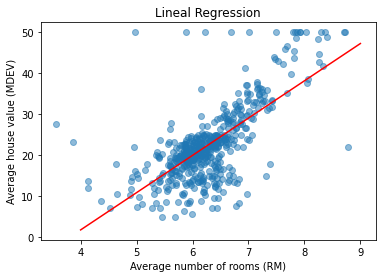

---
Average value for 9 rooms house:  [47.24836005]
Average number of rooms for a 45.000$ house:  [8.75298471]
---
Mean Square Error: 43.60055177116956


In [4]:
plt.title("Lineal Regression")
plt.scatter(X[:, 5], Y, alpha=0.5)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Average house value (MDEV)")

# We expand X with a column vector full of ones
aX = np.hstack((np.ones((n,1)), X[:,5:6]))

_Y = Y[:, np.newaxis]

# We calculate the lineal regression by the Ordinari Least Squares Method
W = np.linalg.inv(aX.T @ aX) @ aX.T @ _Y

# Plot the regression line from 2004 to 2016.
x0 = [4, 9]
plt.plot(x0, [W[0, 0] + W[1, 0] * x0[0], 
              W[0, 0] + W[1, 0] * x0[1]], 
         c="red")
plt.show()
print("---")
print("Average value for 9 rooms house: ", [1, 9] @ W)
print("Average number of rooms for a 45.000$ house: ", (45 - W[0])/W[1])


print("---")

Yp = aX @ W

ECM = lambda Yp, Y: np.mean(np.power(Yp - Y[:, np.newaxis], 2))
print("Mean Square Error:", ECM(Yp, Y))

## 3. Simple Lineal Regression - Sklearn library

Now we are going to implement the model using the Sklearn library

---
**Tasks:** 

- Make use of the function ***sklearn.linear_model.LinearRegression()*** to train a Simple Linear Regression model with the same variables used in the previous exercise.

- Use the documentation (online or using the "?" command) to study the different parameters that this model accepts. 

- What is the ***fit_intercept*** parameter for? Train the model with and without this parameter and visualize it on a graph.

- Once the model has been fitted, check that the value of the parameters obtained (also called coefficients) is the same as that obtained previously. In the same way, use the ***.predict()*** function, which is already implemented, to check that your predictions were correct. 

- Finally, check that the Mean Squared Error value obtained previously in the previous exercise is equal to the one provided by the already implemented function ***sklearn.metrics.mean_squared_error()***.

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# We create the linear regrssion model.
regr = linear_model.LinearRegression()

# We train the model
regr.fit(X[:, 5:6], Y[:, np.newaxis])

# We make predictions using the trained model
y_pred = regr.predict([[9]])

print(regr.coef_, regr.intercept_)
print(y_pred)
print(mean_squared_error(Y, regr.predict(X[:, 5:6])))

[[9.10210898]] [-34.67062078]
[[47.24836005]]
43.60055177116956


## 4. Multiple Lineal Regression

We can generalize the Simple Linear Regression model by adding more variables and thus obtaining the Multiple Linear Regression model. By adding more variables to the model, we are providing it with more information to help improve predictions. For example, a Simple Linear Regression model might try to predict a person's height based on hand size. But if we were to add another variable, such as gender, we could have more information to make more reliable predictions.

At the code level, there is not much difference between the two models, which can also be solved by the ***Ordinary Least Squares*** method by evaluating the expression we already know:

<br>
<center>$W = (X^TX)^{-1}X^TY$</center>
<br>

**Tasks:** 

1. To perform a Multiple Linear Regression model using the variables **MR** (Average number of rooms), **LSTAT** (Percentage of population in the neighborhood classified as low class) and **PTRATIO** (Ratio of student-teacher in the neighborhood).

2. Observe the value of the coefficients and interpret them.

3. Use the Linear Regression model implemented by the **Sklearn** library to train this same model and check that the coefficients you have obtained are correct.

4. Evaluate the model using the function ***sklearn.metrics.mean_squared_error()***. and compare the error value obtained in exercise 2 with the Simple Linear Regression Model. Is the error larger or smaller? Why does this happen?


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# We expand X with a column vector full of ones.
aX = np.hstack((np.ones((n,1)), X[:,[5, 10, 12]]))

_Y = Y[:, np.newaxis]

# We calculate the lineal regression by the Ordinary Least Squares
W = np.linalg.inv(aX.T @ aX) @ aX.T @ _Y

print(W)

print("---")

Yp = aX @ W

ECM = lambda Yp, Y: np.mean(np.power(Yp - Y[:, np.newaxis], 2))
print("Mean Square Error:", ECM(Yp, Y))


# We create the lineal regression model
regr = linear_model.LinearRegression()

# We train the model.
regr.fit(aX, Y[:, np.newaxis])

print("---")
print(regr.intercept_, regr.coef_)
print(y_pred)
print(mean_squared_error(Y, regr.predict(aX)))


[[18.56711151]
 [ 4.51542094]
 [-0.93072256]
 [-0.57180569]]
---
Mean Square Error: 27.130405758497066
---
[18.56711151] [[ 0.          4.51542094 -0.93072256 -0.57180569]]
[[47.24836005]]
27.130405758497062


We observe that the MSE obtained with the Multiple Regression is lower that the one obtained with Simple Regression.

# Polinomial Regression

## 1. Opening the dataset

Now we are going to load our data from a file uploaded from the computer, we will load the file *insurance.csv*. This file presents a time series that we will assume to have exported from one of the tables in our company's database, where we will only have two variables: ***Year***, the year to which the variable refers and ***Av_claims***, the average monthly parts.

---

** Tasks **

1. Load the *insurance.csv* file into a data matrix. For this we will use the ***np.genfromtxt()*** function of the ***Numpy*** library, although we could also use the ***Pandas*** library.

2. Generate a graph showing the evolution of ***Av_claims*** over the years.

3.  Perform a ***Simple Linear Regression*** model on the time series to find the straight line that best fits the data. Once we have the model trained, visualize the line and check how well it fits the data.

4. (Bonus) We have insisted that the fit of the ***Simple Linear Regression*** model gives you the value of the parameters whose value minimizes the ***Mean Squared Error*** function. But... Why should you believe it when you already know the tools to check it yourself? Create a graph where on the X axis represent different values of one of the two parameters (choose between $w_0$ or $w_1$), and on the Y axis the error obtained through the cost function, when we vary the value of the parameter we have plotted on the X axis (the value of the other parameter, the one you have not chosen to plot on the X axis, should always have a fixed value equal to the one obtained in the Ordinary Least Squares method of point 3). This should generate a parabolic curve whose minimum point, the minimum of the error, occurs when the parameter on the X-axis is equal to the value obtained in point 3.

To calculate the linear regression simply evaluate the following expression:

<center> $W = (X^TX)^{-1}X^TY$ </center>



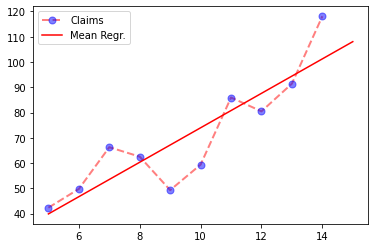

---
Bonus
[6.81878788]


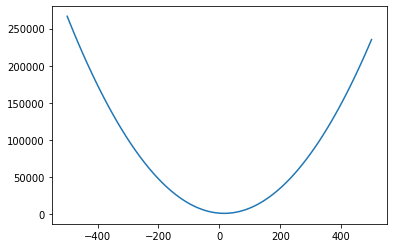

In [7]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt


# We load the data file, delimeted with commas and skipping the header
data = genfromtxt("./insurance.csv", delimiter=",", skip_header=True)

n, p = data.shape


# We generate the X and Y matrices.
X = data[:,0:1]
Y = data[:,1:2]

plt.plot(data[:, 0], data[:, 1], color='red',linestyle='dashed',linewidth=2,
                                 marker='o',markersize=7,markerfacecolor='blue',
                                 markeredgecolor='blue', alpha=0.5 ,label='Claims')


# We expand X with a column vector full of ones.
aX = np.hstack((np.ones((n,1)), X))

# We calculate the Lineal Regression  with the Least Square Methods.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

# We generate the prediction for the points of the line
_X = np.array([[1, 5], [1, 15]])
_Y = _X @ W

plt.plot(_X[:,1], _Y, c="red", label='Mean Regr.')
plt.legend()
plt.show()

print("---")
print("Bonus")
_x = np.linspace(-500, 500, 100)

# We calculate an array of Mean Square Erros
mse = [np.square(aX @ np.array([w1, W[0,0]]) - Y).mean() for w1 in _x]

plt.plot(_x, mse)
plt.plot([W[0],W[0]], [0, 50])
print(W[1])

## 2. Polinomial Regrssion

It seems that the Simple Linear Regression model, as we have proposed it, fails to fully capture the relationship between the two variables. Fortunately, we now know that we can add more flexibility to the model by making use of the magic of polynomials! 

---

**Task:**

1. Implement a function that takes as input parameter the matrix $X$ and an integer representing the **degree** of the polynomial. The task of such a function will be to create an output matrix, whose columns are each of the columns of the original matrix, raised to all the powers existing between 0 and the number specified by the **degree** parameter. For example, if the input matrix is the following:

$
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

and the specified degree is 3, then the generated matrix will be:

$
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

2. Once the function is implemented, use it to process the $X$ matrix with the following degrees $g = [1, 2, 3, 4, 5, 6]$, and fit the model for each of these matrices. Jointly plot each of the regression lines obtained, as well as calculate the ***Mean Squared Error*** for these models. To make these plots, investigate the **matplotlib.pyplot.subplots** function to distribute all plots in three rows with two plots in each.

In [8]:
def poly_matrix(X, grad):

  n, p = X.shape

  # Columns with ones
  Xt = np.ones((n,1))
  
  # We add the matrix raised to the corresponding degreee
  for g in range(grad):
    Xt = np.hstack((Xt, np.power(X, g+1)))
      
  return Xt

Degree: 0 MSE: 492.2238960000001
Degree: 1 MSE: 108.63298387878794
Degree: 2 MSE: 72.54733046969697
Degree: 3 MSE: 54.17722904195847
Degree: 4 MSE: 50.78427519230897
Degree: 5 MSE: 45.47970748716767
Degree: 6 MSE: 19.08737876618077
Degree: 7 MSE: 10.268263522401243


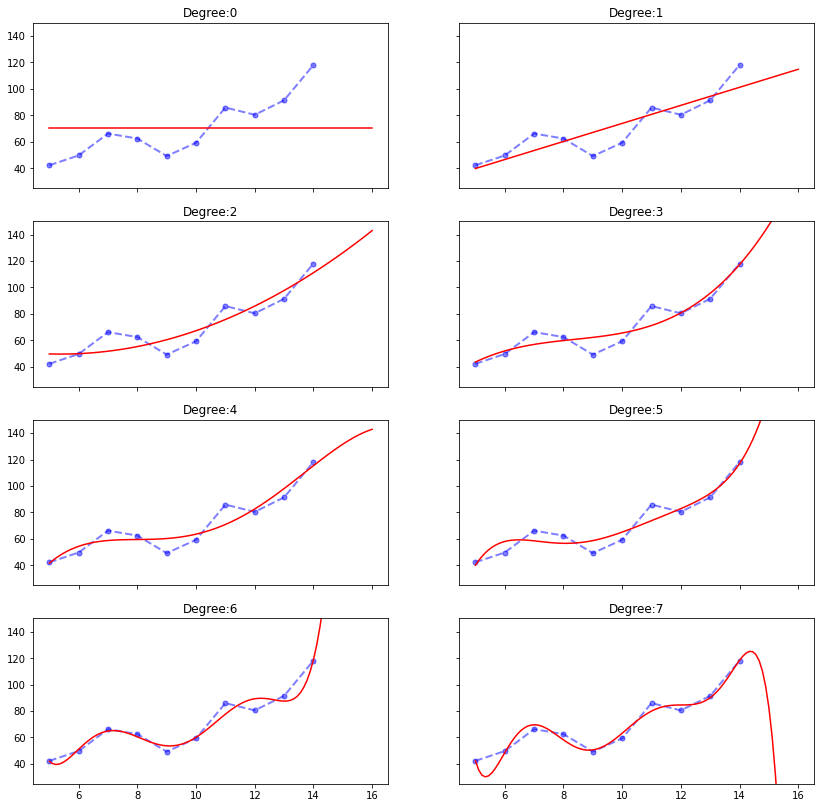

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(14, 14), sharex='all', sharey='all')

g = [1,2,3,4,5,6,8,9] # Degrees of polinomial regression
i = 0

for row in range(0,4):
  for col in range(0,2):

    aX = poly_matrix(X, i)

    # We calculate the Lineal Regression by the Ordinary Least Squares
    W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

    _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]


    axes[row, col].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                      marker='o',markersize=5,markerfacecolor='blue',
                                      markeredgecolor='blue', alpha=0.5)
    plt.ylim(25, 150)

    axes[row, col].set_title("Degree:"+str(i))
    axes[row, col].plot(_X, poly_matrix(_X, i) @ W, c="red")
    
    ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
    
    print("Degree:", i,"MSE:", ECM(poly_matrix(X, i) @ W, Y))

    i+=1

## 3. Regresión Polinomial - Sklearn.

---
**Tarea** : Como ya va siendo costumbre en estos ejercicios y también en casos reales, la primera vez implementamos, pero ya a la segunda: reutilizamos. Vamos a repetir el mismo análisis de **Regresión Polinomial** que hemos realizado en el ejercicio anterior, pero en esta ocasión haciendo uso de la función ***sklearn.preprocessing.PolynomialFeatures()*** de la librería ***Sklearn***. Recuerda que en este caso Sklearn transforma tu matriz $X$ para añadir coeficientes polinomiales **y también sus interacciones**, cosa que no hemos incluido en el ejercicio anterior. Por esto mismo, es de esperar que los resultados no sean iguales (por ejemplo el*** Error Cuadrático Medio***), pero no te preocupes, la calidad del análisis debe ser igual o mejor. Visualiza los modelos entrenados para cada grado de la misma forma que hicimos en el ejercicio previo (reutiliza el código).


Grado: 1 ECM: 108.63298387878785
Grado: 2 ECM: 72.54733046969696
Grado: 3 ECM: 54.17722904195789
Grado: 4 ECM: 50.78427519230741
Grado: 5 ECM: 45.47970748717825
Grado: 6 ECM: 19.08737875968999


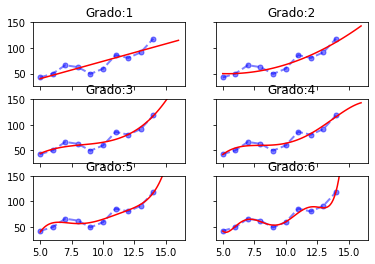

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')

for gr in range(1,7):

  poly = PolynomialFeatures(gr)
  
  # Transformamos polinomialmente a X.
  aX = poly.fit_transform(X)

  # Entrenamos el modelo de Regresión Lineal Multiple
  # con las variables polinomiales.
  lreg = LinearRegression(fit_intercept=False)
  lreg.fit(aX, Y)
  
  # Generamos matriz W y reutilizamos
  # el código del ej. anterior.
  W = np.array(lreg.coef_).T
  
  _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]

  axs0 = [0, 0, 1, 1, 2, 2]
  axs1 = [0, 1, 0, 1, 0, 1]
  
  axes[axs0[gr-1], axs1[gr-1]].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)
  
  plt.ylim(25, 150)

  axes[axs0[gr-1], axs1[gr-1]].set_title("Grado:"+str(gr))
  axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")
  
  ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
  
  print("Grado:", gr,"ECM:", ECM(poly_matrix(X, gr) @ W, Y))

# Logistic Classification


## 1. Exploratory análisis

Let's solve the classification problem on the Wisconsin Breast Cancer dataset. The dataset consists of a list of characteristics of many cells, some are benign and some are malignant.

The dataset is available in Kaggle and can be downloaded at this link:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

**Tasks:**
1. Load the dataset from the .csv file using **Pandas** (*pd.read_csv()*) and create the input data array $X$, containing the variables indicating the properties of the cell nuclei, and the output vector $Y$ containing the information whether the cancer is benign ('B') or malignant ('M'). You can check *Kaggle* for the information in this dataset.

2. For the Machine Learning analysis we are going to use, it is convenient that the vector $Y$ represents the two possible classes with integers and not letters. Transform the contents of the output vector $Y$ so that it contains a 0 if the cancer is benign and a 1 if the cancer is malignant. You may find it helpful to use the ***.map()*** function.

3. To analyze if there is any relationship between the variables, let's calculate the pairwise correlation matrix. This can be done using the ***numpy.corrcoef*** function, or if the dataset is of type ***Panda.DataFrame*** with the ***.corr()*** function. Visualize the correlation matrix obtained and take care of the style so that the visualization can be understood: variable names in each axis, appropriate size, color bar indicating the legend used, etc. In this sense you may find it more comfortable to use the visualization library ***Seaborn*** and its function **sb.heatmap()**, which is much more powerful for this case.

4. Perhaps to solve a Classification problem it is not so important to know what is the correlation of the input variables. However, many of them may be unnecessary and may be detrimental to the performance of our algorithm because of what is known as ***The Curse of Dimensionality.*** Interpret the correlation matrix you have plotted in Section 2.

**Warning!** When loading the dataset, remember to indicate which column contains the indexes of your data, with the parameter *index_col=* to prevent ***Pandas*** from including an unnecessary column. 

In [11]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [12]:
# The index_col parameter indicates which column contains the index of data
# So then Pandas does not include an innecessary column
cancer_data = pd.read_csv("./breastcancer.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
X = X.drop(columns=['Unnamed: 32'])
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

# We save the column names
cols = X.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


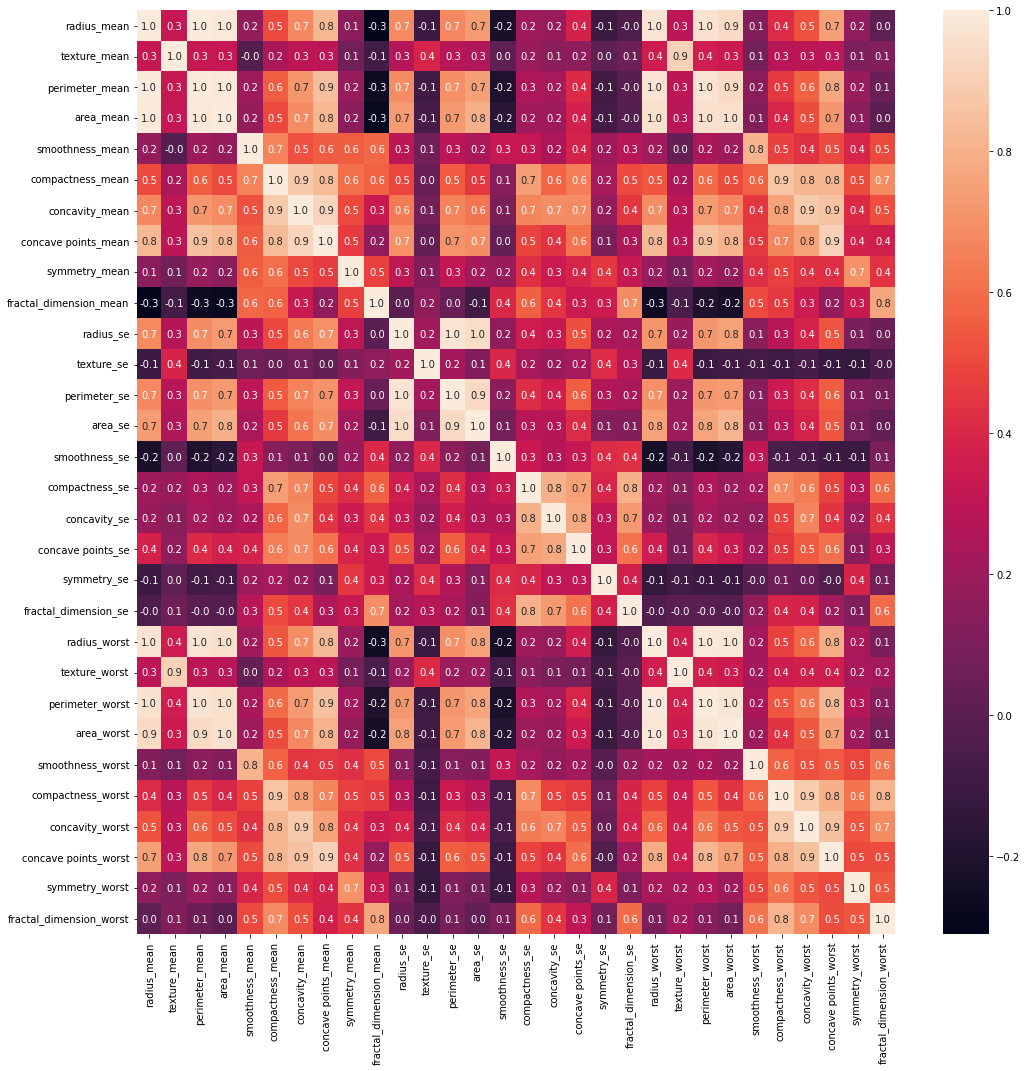

In [13]:
corr = X.corr()

# We define the size of the plot
plt.subplots(figsize=(17,17))

# The heatmap function of Seaborn is pretty useful to create correlatio nmatrices.
sb.heatmap(corr, annot=True, fmt= '.1f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

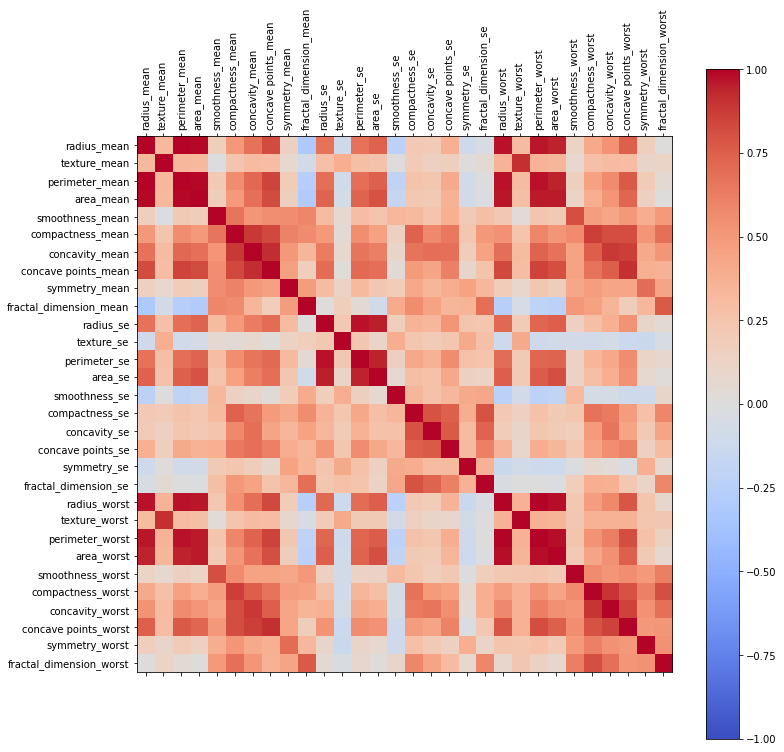

In [14]:
# Version using only matplotlib

plt.figure(figsize=(12,12))
plt.matshow(X.corr(), cmap="coolwarm", vmin=-1.0, vmax=1.0, fignum=1)

plt.grid(False)
plt.colorbar()

plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)

plt.show()

## 2. Logistic Regression - Sklearn

---

**Tasks:**

1. Implement the error function ***LogLoss***. This function should take two input parameters $Y$ and $Y_p$ and should return the result of calculating the error function. Once implemented, perform plots for fixed values of $Y={0, 0.5, 1}$ where we can check what is the error assigned to each of the predictions in the range 0-1. That is, we will plot on the X-axis the values of $Y_p$ and on the Y-axis the values of the error function.

**Extra** Overlap on each of the plots the error function of the MSE and compare the differences.

2.  To measure the ability of our model to generalize its predictions and control the occurrence of ***overfitting***, a simple (and frequently used) way is to randomly divide your data set into a *training dataset*, with which you fit the model, and a *test dataset*, with which you evaluate the model. Here we test whether the model generalizes or not, since the data with which we evaluate has never before been seen by the model during training. In this sense, use the function ***sklearn.train_test_split()*** to randomly generate a training and validation data set. Find a way for the size of the train/test data sets to be 70%/30%.

3. Use the Logistic Regression model implemented in Sklearn (***sklearn.linear_model.LogisticRegression()***) to build a binary classifier model that uses your $X$ input variables to predict whether the identified cells are *Benign* or *Malign*. Train your model with the training data set generated in *exercise 1* and validate it using the ***score()*** function on the validation data set. You are free to select the input variables you consider most important, many or few, and to preprocess them as you think reasonable.

**Important:** Note that once you get a trained model and evaluate it with the ***score()*** function, every time you run the cell again, you will see that this value will change. This is because we are generating a new random train/test partition each time we run the cell, and therefore, the performance of the model is changing. 

However, we will add the attribute *random_state=0* to the function *train_test_split()* to eliminate this randomness and work with the same partitions (WARNING! this would not be a good practice in ML).

In [15]:
from sklearn import linear_model,model_selection,preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import random
from math import log

import sklearn

In [16]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

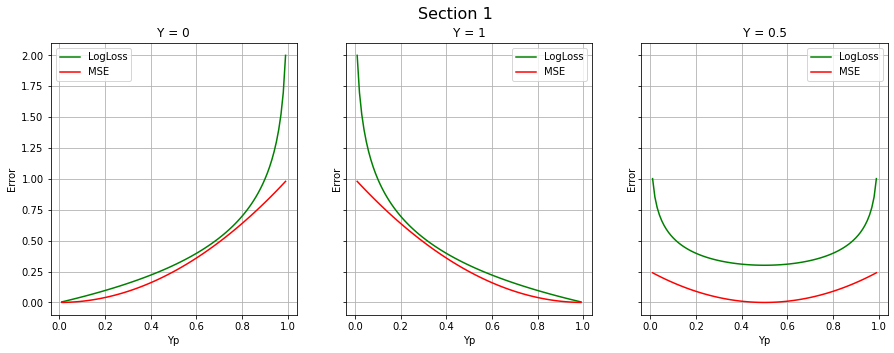

In [17]:
# Section 1 - LogLoss

yp = np.arange(0.01,1, step = 0.01) # Array with predictions
y0 = np.zeros(len(yp), dtype=int)   # Array with fixed values of Y
y1 = np.ones(len(yp), dtype=int)    # y1 = y0 + 1
y5 = np.full((len(yp)), 0.5)        # y5 = y0 + 0.5

def logloss(y, yp):
  return -(y*np.log10(yp) + (1-y)*np.log10(1-yp))

mse0 = np.zeros((len(yp))) 
mse1 = np.zeros((len(yp))) 
mse5 = np.zeros((len(yp))) 

for i in range(len(yp)):  
  mse0[i] = skl.metrics.mean_squared_error([0], [yp[i]])
for i in range(len(yp)):  
  mse1[i] = skl.metrics.mean_squared_error([1], [yp[i]])
for i in range(len(yp)):  
  mse5[i] = skl.metrics.mean_squared_error([0.5], [yp[i]])


fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey='all')
fig.suptitle('Section 1', fontsize=16)

axs[0].plot(yp, logloss(y0, yp), c='g', label='LogLoss')
axs[0].plot(yp, mse0, c='r', label='MSE')
axs[0].set_title('Y = 0')
axs[0].set_xlabel('Yp')
axs[0].set_ylabel('Error')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(yp, logloss(y1, yp), c='g', label='LogLoss')
axs[1].plot(yp, mse1, c='r', label='MSE')
axs[1].set_title('Y = 1')
axs[1].set_xlabel('Yp')
axs[1].set_ylabel('Error')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(yp, logloss(y5, yp), c='g', label='LogLoss')
axs[2].plot(yp, mse5, c='r', label='MSE')
axs[2].set_title('Y = 0.5')
axs[2].set_xlabel('Yp')
axs[2].set_ylabel('Error')
axs[2].grid(True)
axs[2].legend()


In [18]:
# Training withour preprocessing.

l1 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l1.append(clf.score(X_test, Y_test))
  
np.mean(l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9419415204678362

In [19]:
# Training with polinomial variables.

l2 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l2.append(clf.score(X_test, Y_test))
  
np.mean(l2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9492163742690058

In [20]:
# Training with Scaling.

l3 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True, with_std=True), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l3.append(clf.score(X_test, Y_test))
  
np.mean(l3)

0.9763508771929823

In [21]:
# Training with polinomial variables + Scaling

l4 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l4.append(clf.score(X_test, Y_test))
  
np.mean(l4)

0.9630877192982455

In [22]:
# Training with polinomial variables + Scaling + PCA

l5 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale
  from sklearn.decomposition import PCA

  pca = PCA(n_components=25)
   
  X_train, X_test, Y_train, Y_test = train_test_split(pca.fit_transform(scale(X, with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)
    
  clf  = LogisticRegression().fit(X_train, Y_train)

  l5.append(clf.score(X_test, Y_test))
  
np.mean(l5)

0.975766081871345

In [23]:
print("Basic: ", np.mean(l1))
print("Polinomials: ", np.mean(l2))
print("Scaled: ", np.mean(l3))
print("Pl + Sc.: ", np.mean(l4))
print("Pl + Sc + PCA: ",  np.mean(l5))

Basic:  0.9419415204678362
Polinomials:  0.9492163742690058
Scaled:  0.9763508771929823
Pl + Sc.:  0.9630877192982455
Pl + Sc + PCA:  0.975766081871345
